In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [36]:
df = pd.read_csv('Leads[1].csv')

In [37]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [38]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# EDA

In [40]:
sum(df.duplicated(subset='Prospect ID'))==0

True

In [41]:
sum(df.duplicated(subset='Lead Number'))==0

True

In [42]:
df = df.drop(['Prospect ID','Lead Number'],axis=1)

In [43]:
df = df.replace('Select', np.nan)

In [44]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [45]:
#checking percentage of Null values
round((df.isnull().sum()/len(df.index)*100),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [46]:
col = df.columns
for i in col:
    if (round((df[i].isnull().sum()/len(df.index)*100),2) > 45):
        df.drop(i,axis=1,inplace=True)

In [47]:
round((df.isnull().sum()/len(df.index)*100),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [52]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [51]:
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Country', ylabel='count'>

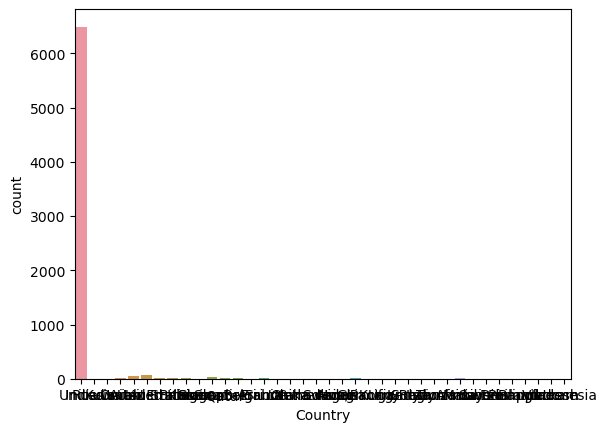

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'India'),
 Text(1, 0, 'Russia'),
 Text(2, 0, 'Kuwait'),
 Text(3, 0, 'Oman'),
 Text(4, 0, 'United Arab Emirates'),
 Text(5, 0, 'United States'),
 Text(6, 0, 'Australia'),
 Text(7, 0, 'United Kingdom'),
 Text(8, 0, 'Bahrain'),
 Text(9, 0, 'Ghana'),
 Text(10, 0, 'Singapore'),
 Text(11, 0, 'Qatar'),
 Text(12, 0, 'Saudi Arabia'),
 Text(13, 0, 'Belgium'),
 Text(14, 0, 'France'),
 Text(15, 0, 'Sri Lanka'),
 Text(16, 0, 'China'),
 Text(17, 0, 'Canada'),
 Text(18, 0, 'Netherlands'),
 Text(19, 0, 'Sweden'),
 Text(20, 0, 'Nigeria'),
 Text(21, 0, 'Hong Kong'),
 Text(22, 0, 'Germany'),
 Text(23, 0, 'Asia/Pacific Region'),
 Text(24, 0, 'Uganda'),
 Text(25, 0, 'Kenya'),
 Text(26, 0, 'Italy'),
 Text(27, 0, 'South Africa'),
 Text(28, 0, 'Tanzania'),
 Text(29, 0, 'unknown'),
 Text(30, 0, 'Malaysia'),
 Text(31, 0, 'Liberia'),
 Text(32, 0, 'Switzerland'),
 Text(33, 0, 'Denmark'),
 Text(34, 0, 'Philippines'),
 Text(35, 0, 'Bangladesh'),
 Text(36, 0, 'Vietnam'),
 Text(37, 0, 'Indonesia')]

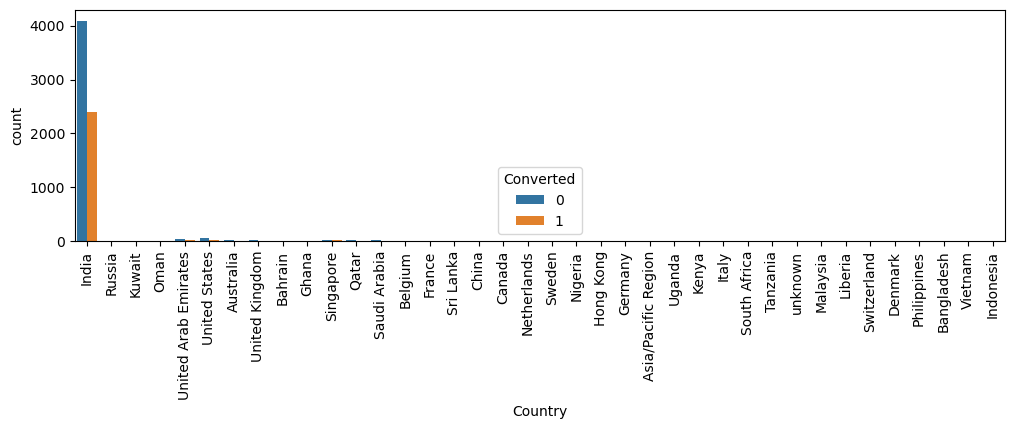

In [56]:
plt.figure(figsize=(12,3))
country_plot = sns.countplot(df['Country'],hue=df['Converted'])
country_plot.set_xticklabels(country_plot.get_xticklabels(),rotation = 90)

In [57]:
# most of the data is from India, do drop "Country"
df = df.drop('Country',axis = 1)

In [58]:
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='City', ylabel='count'>

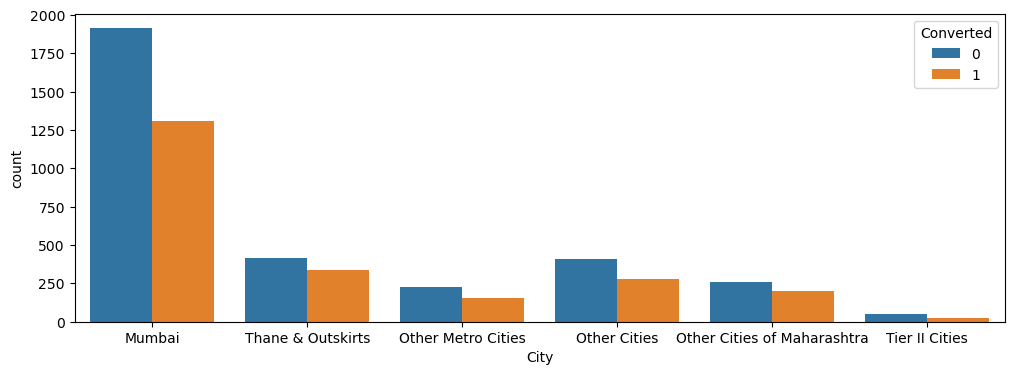

In [60]:
plt.figure(figsize=(12,4))
sns.countplot(df['City'],hue=df['Converted'])

In [61]:
df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [65]:
df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='City', ylabel='count'>

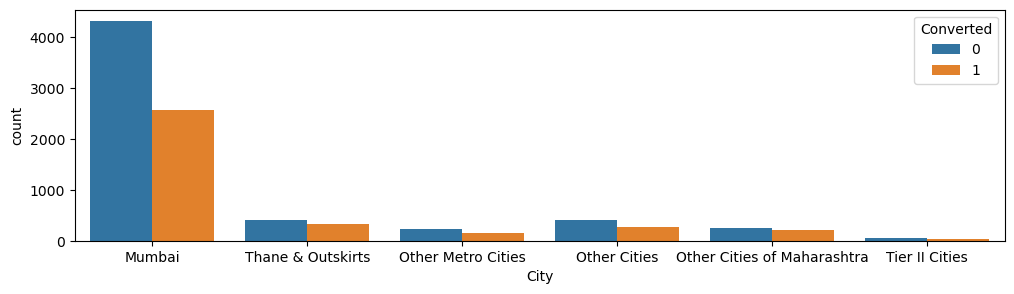

In [67]:
plt.figure(figsize=(12,3))
sns.countplot(df['City'],hue=df['Converted'])

In [68]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [72]:
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [73]:
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Other')

In [74]:
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

In [75]:
df['Lead Source'] = df['Lead Source'].replace('Facebook', 'Social Media')

In [76]:
df['Lead Source'] = df['Lead Source'].replace('NC_EDM', 'Other')

In [77]:
df['Lead Source'] = df['Lead Source'].replace('blog', 'Other')

In [78]:
df['Lead Source'] = df['Lead Source'].replace('WeLearn', 'Other')

In [79]:
df['Lead Source'] = df['Lead Source'].replace('welearnblog_Home', 'Other')

In [80]:
df['Lead Source'] = df['Lead Source'].replace('Pay per Click Ads', 'Other')

In [81]:
df['Lead Source'] = df['Lead Source'].replace('testone', 'Other')

In [82]:
df['Lead Source'] = df['Lead Source'].replace('youtubechannel', 'Other')

In [83]:
df['Lead Source'] = df['Lead Source'].replace('Live Chat', 'Other')

In [84]:
df['Lead Source'] = df['Lead Source'].replace('Press_Release', 'Other')

In [85]:
df['Lead Source'] = df['Lead Source'].replace('Click2call', 'Other')

In [86]:
df['Lead Source'] = df['Lead Source'].replace('bing', 'Other')

In [87]:
df['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Other                 57
Name: Lead Source, dtype: int64

In [88]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Lead Source', ylabel='count'>

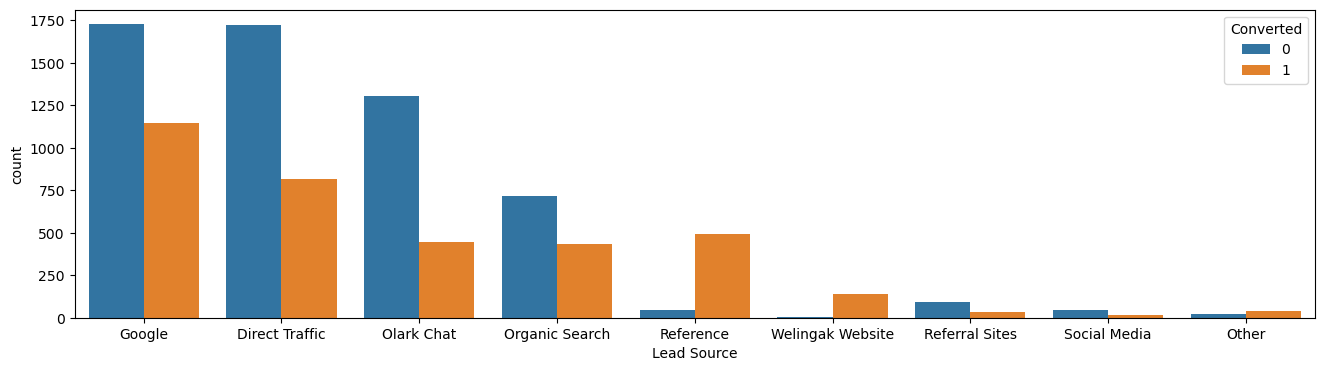

In [92]:
plt.figure(figsize=(16,4))
sns.countplot(df['Lead Source'],hue=df['Converted'],order=df['Lead Source'].value_counts().index)

In [99]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [103]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'Not Specified'),
 Text(1, 0, 'Business Administration'),
 Text(2, 0, 'Media and Advertising'),
 Text(3, 0, 'Management'),
 Text(4, 0, 'Travel and Tourism'),
 Text(5, 0, 'Human Resource Management'),
 Text(6, 0, 'Marketing Management'),
 Text(7, 0, 'Banking, Investment And Insurance'),
 Text(8, 0, 'International Business'),
 Text(9, 0, 'E-COMMERCE'),
 Text(10, 0, 'Operations Management'),
 Text(11, 0, 'Retail Management'),
 Text(12, 0, 'Services Excellence'),
 Text(13, 0, 'Hospitality Management'),
 Text(14, 0, 'Rural and Agribusiness'),
 Text(15, 0, 'Healthcare Management'),
 Text(16, 0, 'E-Business')]

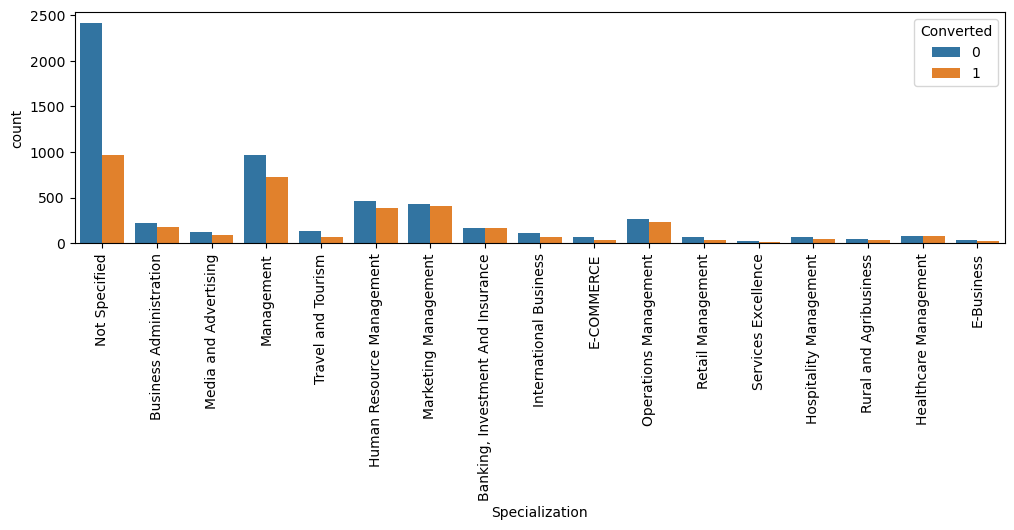

In [106]:
plt.figure(figsize=(12,3))
specialization_plot = sns.countplot(df['Specialization'],hue=df['Converted'])
specialization_plot.set_xticklabels(specialization_plot.get_xticklabels(),rotation = 90)

In [107]:
df['Specialization'] = df['Specialization'].replace(['Human Resource Management','Marketing Management'
                                                     ,'Operations Management','Retail Management','Hospitality Management',
                                                     'Healthcare Management'], 'Management')

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'Not Specified'),
 Text(1, 0, 'Business Administration'),
 Text(2, 0, 'Media and Advertising'),
 Text(3, 0, 'Management'),
 Text(4, 0, 'Travel and Tourism'),
 Text(5, 0, 'Banking, Investment And Insurance'),
 Text(6, 0, 'International Business'),
 Text(7, 0, 'E-COMMERCE'),
 Text(8, 0, 'Services Excellence'),
 Text(9, 0, 'Rural and Agribusiness'),
 Text(10, 0, 'E-Business')]

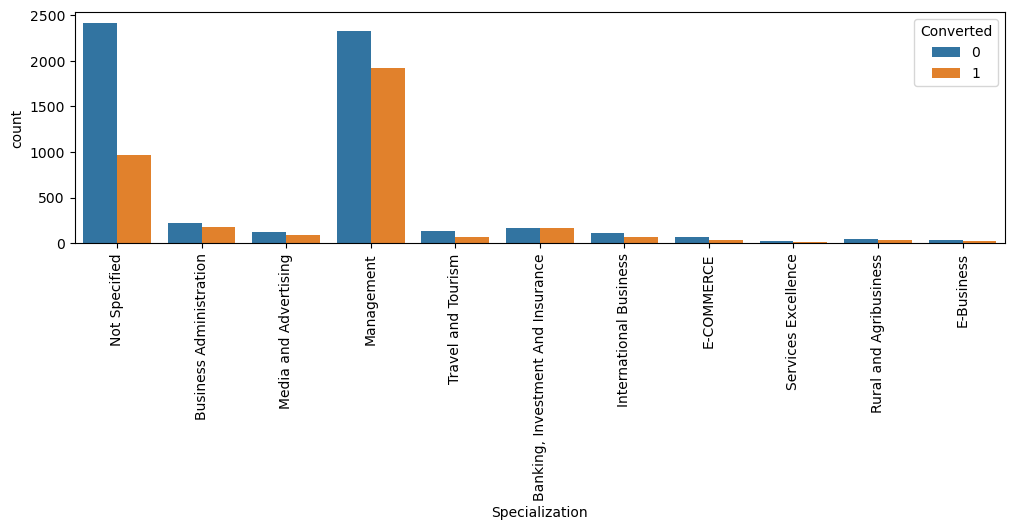

In [108]:
plt.figure(figsize=(12,3))
specialization_plot = sns.countplot(df['Specialization'],hue=df['Converted'])
specialization_plot.set_xticklabels(specialization_plot.get_xticklabels(),rotation = 90)

In [111]:
df['What is your current occupation'].isnull().sum()

2690

In [114]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='What is your current occupation', ylabel='count'>

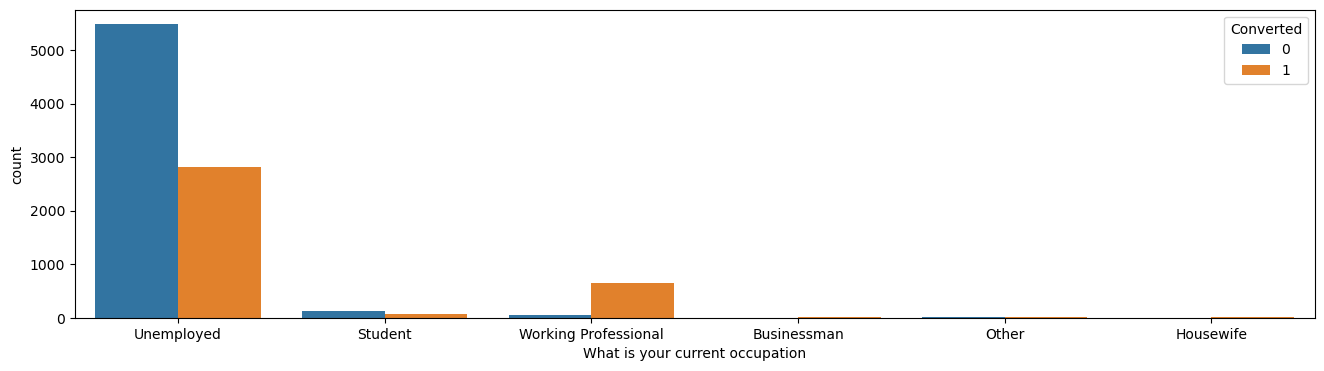

In [115]:
plt.figure(figsize=(16,4))
sns.countplot(df['What is your current occupation'],hue= df['Converted'])

In [116]:
df = df.drop('What matters most to you in choosing a course',axis=1)

In [119]:
df['Tags'] = df['Tags'].replace(np.nan, 'Not Specified')

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'Interested in other courses'),
 Text(1, 0, 'Ringing'),
 Text(2, 0, 'Will revert after reading the email'),
 Text(3, 0, 'Not Specified'),
 Text(4, 0, 'Lost to EINS'),
 Text(5, 0, 'In confusion whether part time or DLP'),
 Text(6, 0, 'Busy'),
 Text(7, 0, 'switched off'),
 Text(8, 0, 'in touch with EINS'),
 Text(9, 0, 'Already a student'),
 Text(10, 0, 'Diploma holder (Not Eligible)'),
 Text(11, 0, 'Graduation in progress'),
 Text(12, 0, 'Closed by Horizzon'),
 Text(13, 0, 'number not provided'),
 Text(14, 0, 'opp hangup'),
 Text(15, 0, 'Not doing further education'),
 Text(16, 0, 'invalid number'),
 Text(17, 0, 'wrong number given'),
 Text(18, 0, 'Interested  in full time MBA'),
 Text(19, 0, 'Still Thinking'),
 Text(20, 0, 'Lost to Others'),
 Text(21, 0, 'Shall take in the next coming month'),
 Text(22, 0, 'Lateral student'),
 Text(23, 0, 'Interested in Next batch'),
 Text(24, 0, 'Recognition issue (DEC approval)'),
 Text(25, 0, 'Want to take admission but has financial prob

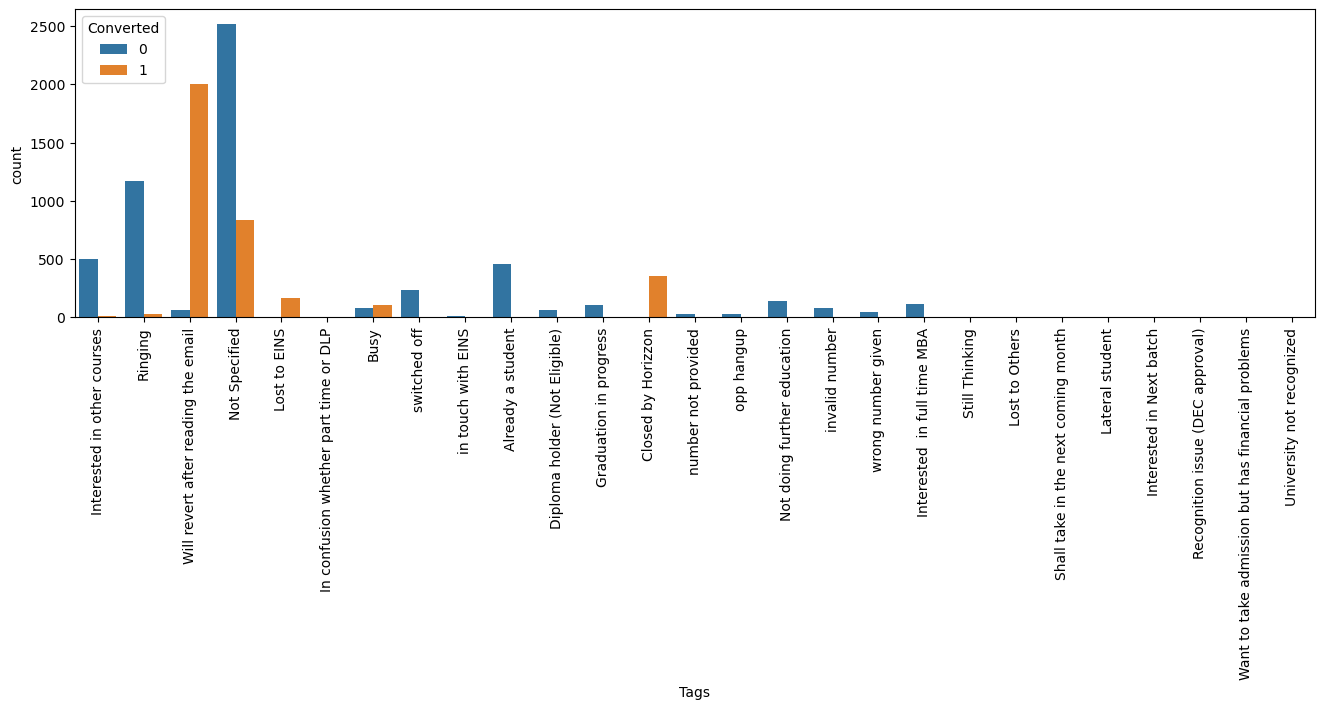

In [120]:
plt.figure(figsize=(16,4))
Tag_plot = sns.countplot(df['Tags'],hue= df['Converted'])
Tag_plot.set_xticklabels(Tag_plot.get_xticklabels(),rotation = 90)

In [121]:
df['Tags'] = df['Tags'].replace(['University not recognized','In confusion whether part time or DLP',
                                 'Want to take admission but has financial problems','in touch with EINS',
                                 'number not provided','Diploma holder (Not Eligible)',
                                 'opp hangup','Not doing further education'
                                 ,'invalid number','wrong number given',
                                 'Interested  in full time MBA', 'Already a student',
                                 'Still Thinking','Lost to Others',
                                 'Shall take in the next coming month','switched off',
                                 'Lateral student', 'Graduation in progress',
                                 'Interested in Next batch',
                                 'Recognition issue (DEC approval)'], 'Other')

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'Interested in other courses'),
 Text(1, 0, 'Ringing'),
 Text(2, 0, 'Will revert after reading the email'),
 Text(3, 0, 'Not Specified'),
 Text(4, 0, 'Lost to EINS'),
 Text(5, 0, 'Other'),
 Text(6, 0, 'Busy'),
 Text(7, 0, 'Closed by Horizzon')]

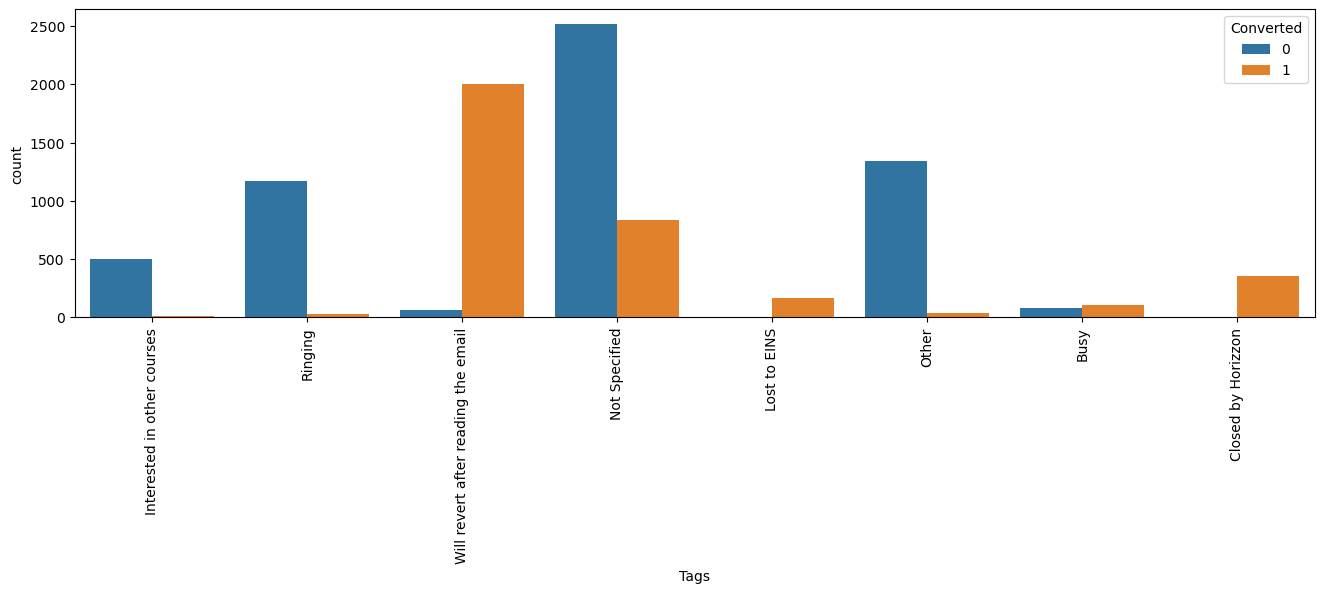

In [122]:
plt.figure(figsize=(16,4))
Tag_plot = sns.countplot(df['Tags'],hue= df['Converted'])
Tag_plot.set_xticklabels(Tag_plot.get_xticklabels(),rotation = 90)

In [123]:
df.isnull().sum()

Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Tags                                          0
Update me on Supply Chain Content       

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'Page Visited on Website'),
 Text(1, 0, 'Email Opened'),
 Text(2, 0, 'Unreachable'),
 Text(3, 0, 'Converted to Lead'),
 Text(4, 0, 'Olark Chat Conversation'),
 Text(5, 0, 'Email Bounced'),
 Text(6, 0, 'Email Link Clicked'),
 Text(7, 0, 'Form Submitted on Website'),
 Text(8, 0, 'Unsubscribed'),
 Text(9, 0, 'Had a Phone Conversation'),
 Text(10, 0, 'View in browser link Clicked'),
 Text(11, 0, 'Approached upfront'),
 Text(12, 0, 'SMS Sent'),
 Text(13, 0, 'Visited Booth in Tradeshow'),
 Text(14, 0, 'Resubscribed to emails'),
 Text(15, 0, 'Email Received'),
 Text(16, 0, 'Email Marked Spam')]

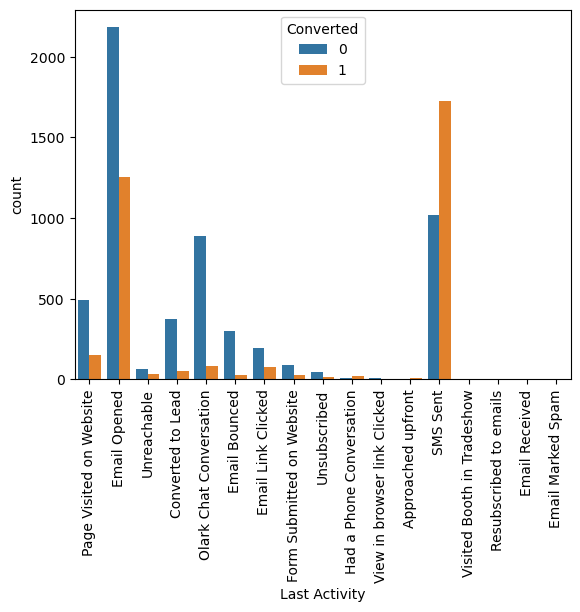

In [125]:
activity_plot = sns.countplot(df['Last Activity'],hue=df['Converted'])
activity_plot.set_xticklabels(activity_plot.get_xticklabels(),rotation = 90)

In [126]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [127]:
df['Last Activity']= df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                  'Had a Phone Conversation','Approached upfront',
                                                  'View in browser link Clicked','Email Received ',
                                                  'Email Marked Spam','Visited Booth in Tradeshow',
                                                  'Resubscribed to emails'], 'Others')

In [129]:
df['Last Activity']= df['Last Activity'].replace('Email Received', 'Others')

In [134]:
df['Last Activity']= df['Last Activity'].replace(np.nan, 'Others')

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'Page Visited on Website'),
 Text(1, 0, 'Email Opened'),
 Text(2, 0, 'Others'),
 Text(3, 0, 'Converted to Lead'),
 Text(4, 0, 'Olark Chat Conversation'),
 Text(5, 0, 'Email Bounced'),
 Text(6, 0, 'Email Link Clicked'),
 Text(7, 0, 'Form Submitted on Website'),
 Text(8, 0, 'SMS Sent')]

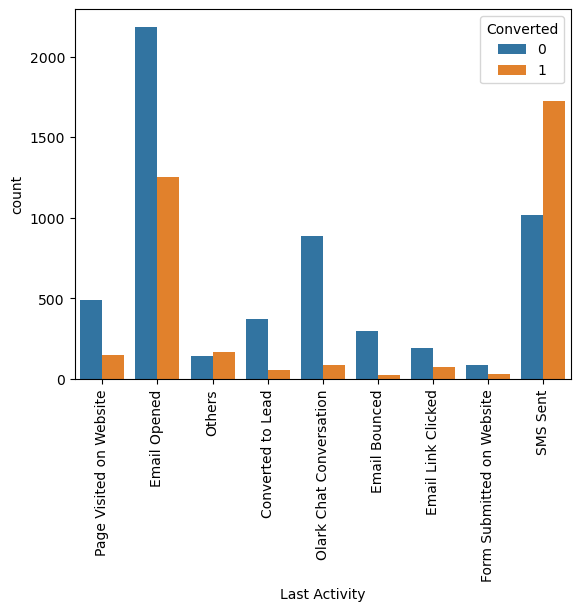

In [135]:
activity_plot = sns.countplot(df['Last Activity'],hue=df['Converted'])
activity_plot.set_xticklabels(activity_plot.get_xticklabels(),rotation = 90)

In [136]:
round((df.isnull().sum()/len(df.index)*100),2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [139]:
df['TotalVisits'].head()

0    0.0
1    5.0
2    2.0
3    1.0
4    2.0
Name: TotalVisits, dtype: float64

In [142]:
df = df.dropna()

In [144]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

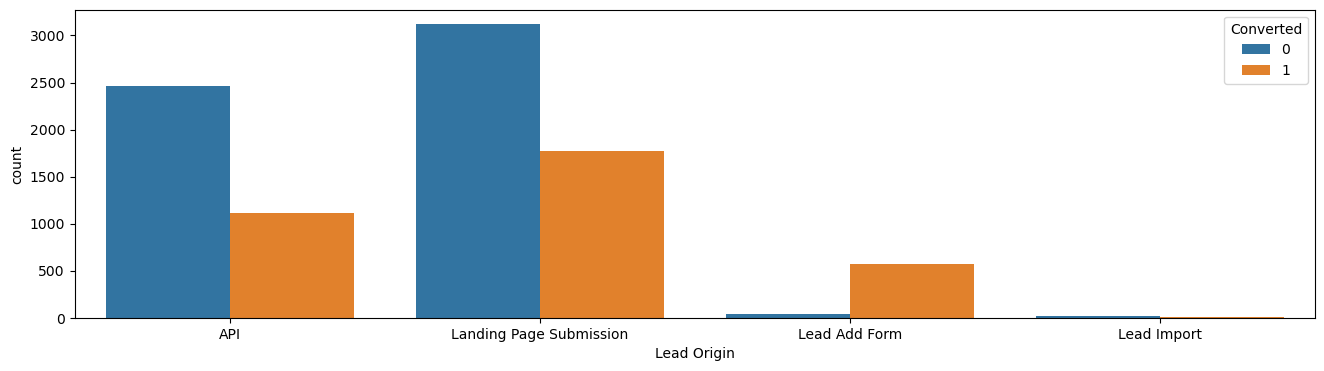

In [146]:
plt.figure(figsize=(16,4))
sns.countplot(df['Lead Origin'],hue=df['Converted'])

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Do Not Email', ylabel='count'>

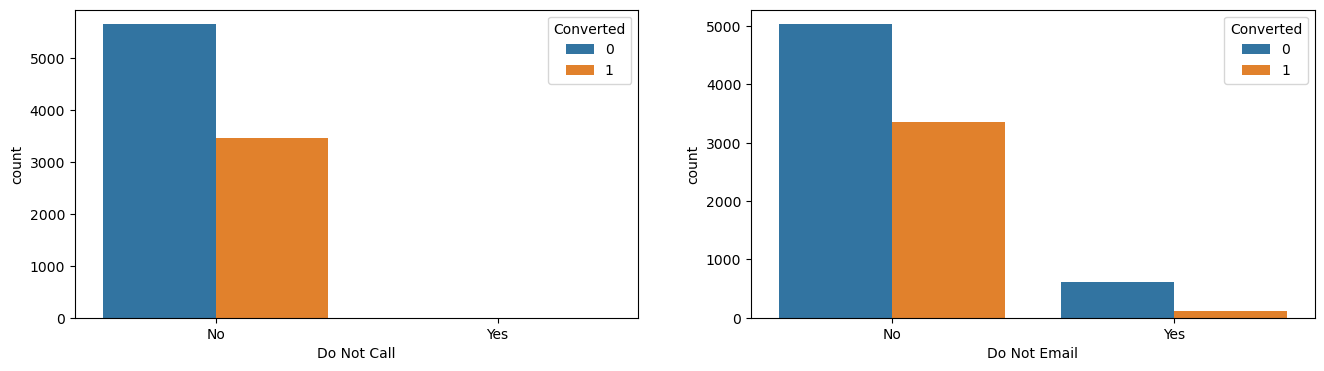

In [148]:
plt.figure(figsize=(16,4))
x1 = plt.subplot(1,2,1)
x1 = sns.countplot(df['Do Not Call'],hue=df['Converted'])

x2 = plt.subplot(1,2,2)
sns.countplot(df['Do Not Email'],hue=df['Converted'])

In [149]:
df = df.drop('Do Not Call',axis=1)

In [154]:
df.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
City                              

In [155]:
df['Search'].value_counts()

No     9089
Yes      14
Name: Search, dtype: int64

In [156]:
df['Magazine'].value_counts()

No    9103
Name: Magazine, dtype: int64

In [158]:
df['Newspaper Article'].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [159]:
df['X Education Forums'].value_counts()

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [160]:
df['Newspaper'].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [161]:
df['Digital Advertisement'].value_counts()

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [162]:
df['Through Recommendations'].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [163]:
df['Receive More Updates About Our Courses'].value_counts()

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [164]:
df['Update me on Supply Chain Content'].value_counts()

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [165]:
df['Get updates on DM Content'].value_counts()

No    9103
Name: Get updates on DM Content, dtype: int64

In [166]:
df['I agree to pay the amount through cheque'].value_counts()

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [167]:
df['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [168]:
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [169]:
df = df.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
             'Receive More Updates About Our Courses','Through Recommendations',
             'Digital Advertisement','Newspaper','X Education Forums','Newspaper Article',
             'Magazine','Search'],axis=1)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'Modified'),
 Text(1, 0, 'Email Opened'),
 Text(2, 0, 'Page Visited on Website'),
 Text(3, 0, 'Email Bounced'),
 Text(4, 0, 'Email Link Clicked'),
 Text(5, 0, 'Unreachable'),
 Text(6, 0, 'Unsubscribed'),
 Text(7, 0, 'Had a Phone Conversation'),
 Text(8, 0, 'Olark Chat Conversation'),
 Text(9, 0, 'SMS Sent'),
 Text(10, 0, 'Approached upfront'),
 Text(11, 0, 'Resubscribed to emails'),
 Text(12, 0, 'View in browser link Clicked'),
 Text(13, 0, 'Form Submitted on Website'),
 Text(14, 0, 'Email Received'),
 Text(15, 0, 'Email Marked Spam')]

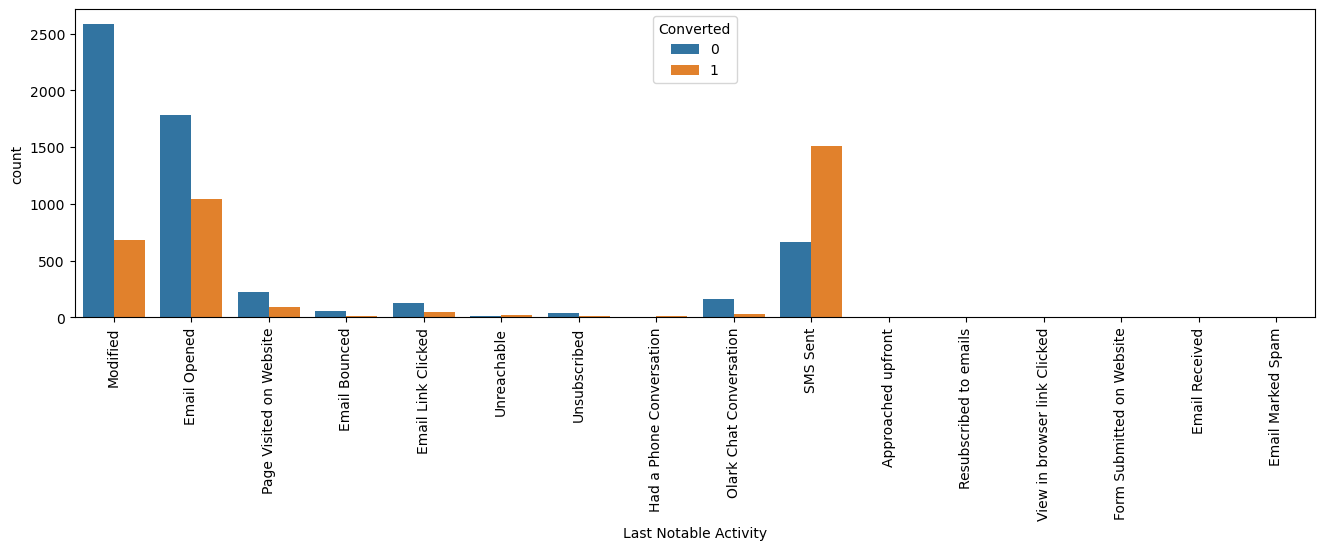

In [176]:
plt.figure(figsize=(16,4))
lna_plot = sns.countplot(df['Last Notable Activity'],hue=df['Converted'])
lna_plot.set_xticklabels(lna_plot.get_xticklabels(),rotation = 90)

In [177]:
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [178]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
'Had a Phone Conversation',
'Email Marked Spam',
'Approached upfront',            
'Resubscribed to emails',        
'View in browser link Clicked', 
'Form Submitted on Website',
'Email Received'],'Other_Notable_activities')

In [180]:
df['Last Notable Activity'].value_counts()

Modified                    3270
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Other_Notable_activities     160
Name: Last Notable Activity, dtype: int64

In [181]:
df['Converted'].value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [184]:
converted_percentage = 3461/(9103)
print(converted_percentage)

0.38020432824343625


<AxesSubplot:>

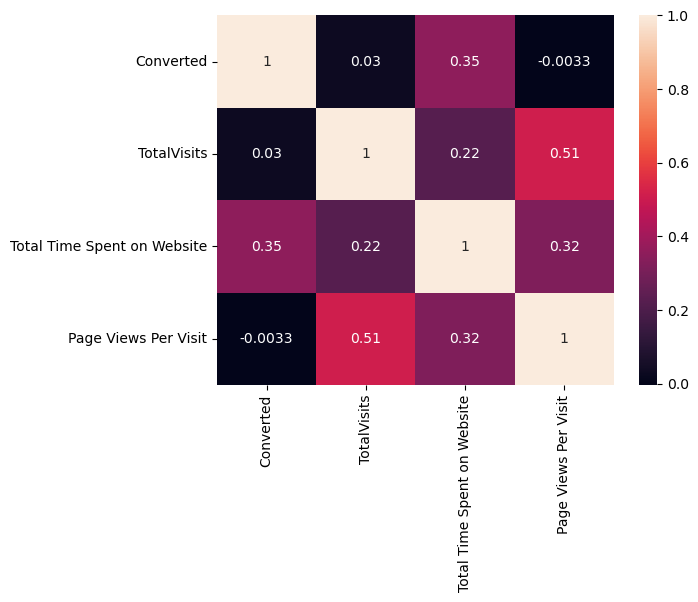

In [186]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:ylabel='TotalVisits'>

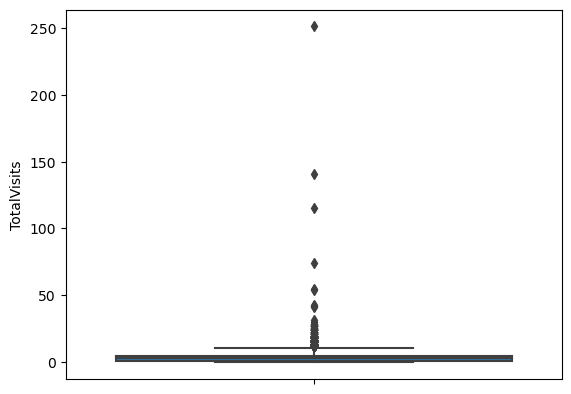

In [188]:
sns.boxplot(y=df['TotalVisits'])

In [191]:
df['TotalVisits'].describe(percentiles=(0.05,0.25,0.50,0.75,0.9,0.95,0.99))

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [192]:
df.shape

(9103, 14)

In [193]:
Q3 = df['TotalVisits'].quantile(0.99)

In [194]:
df = df[df['TotalVisits']<=Q3]

In [195]:
Q1 = df['TotalVisits'].quantile(0.01)

In [196]:
df = df[df['TotalVisits']>=Q1]

<AxesSubplot:ylabel='TotalVisits'>

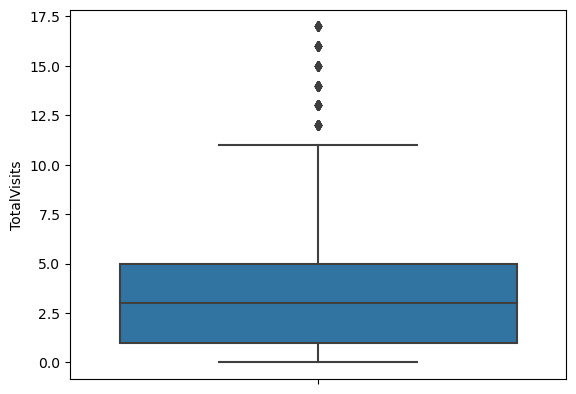

In [197]:
sns.boxplot(y=df['TotalVisits'])

In [198]:
df.shape

(9020, 14)

<AxesSubplot:ylabel='Total Time Spent on Website'>

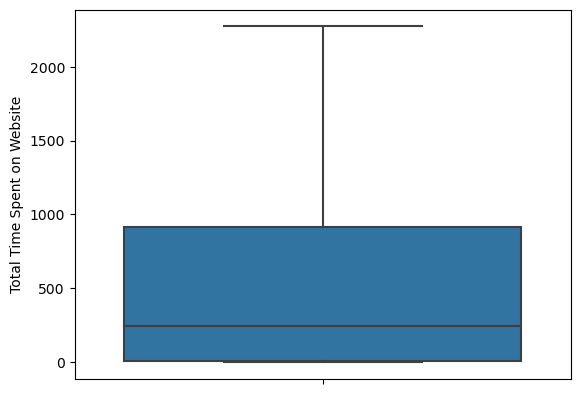

In [199]:
sns.boxplot(y=df['Total Time Spent on Website'])

<AxesSubplot:ylabel='Page Views Per Visit'>

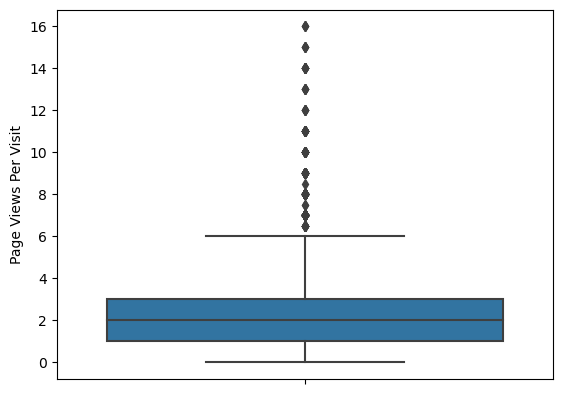

In [200]:
sns.boxplot(y=df['Page Views Per Visit'])

In [202]:
df['Page Views Per Visit'].describe(percentiles=(0.05,0.25,0.5,0.75,0.9,0.95,0.99))

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [203]:
Q3 = df['Page Views Per Visit'].quantile(0.99)

In [204]:
df = df[df['Page Views Per Visit']<=Q3]

In [205]:
df.shape

(8953, 14)

In [206]:
Q1 = df['Page Views Per Visit'].quantile(0.01)

In [207]:
df = df[df['Page Views Per Visit']>=Q1]

In [208]:
df.shape

(8953, 14)

<AxesSubplot:ylabel='Page Views Per Visit'>

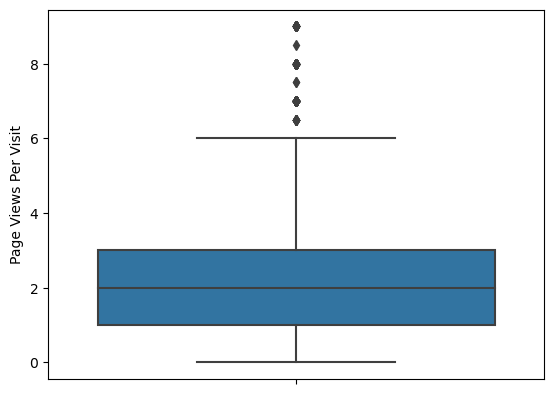

In [209]:
sns.boxplot(y=df['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

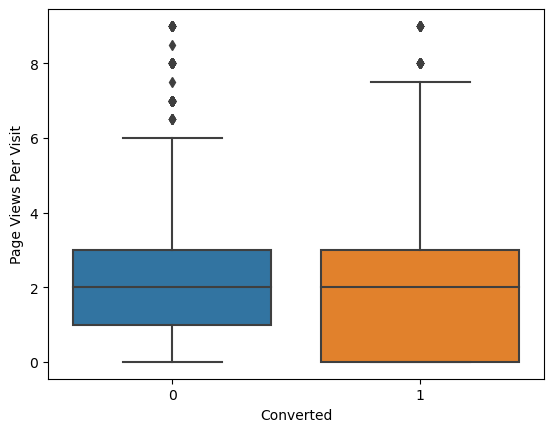

In [211]:
sns.boxplot(y=df['Page Views Per Visit'],x=df['Converted'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

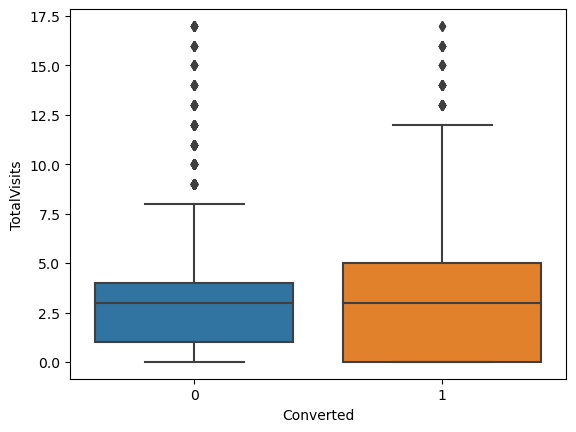

In [212]:
sns.boxplot(y=df['TotalVisits'],x=df['Converted'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

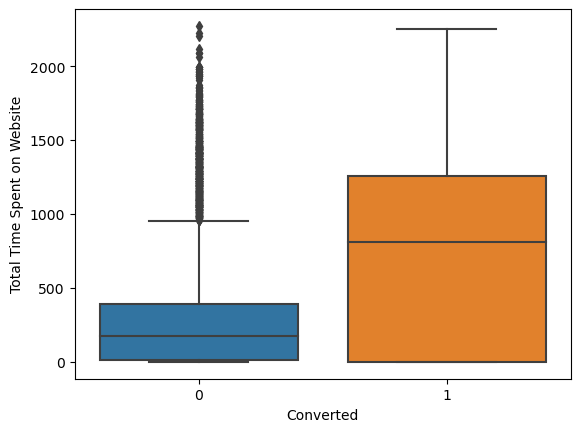

In [213]:
sns.boxplot(y=df['Total Time Spent on Website'],x=df['Converted'])

In [214]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [215]:
df['Lead Origin'].value_counts()

Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64

In [221]:
dummies = pd.get_dummies(df[['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization','What is your current occupation',
               'Tags','City','A free copy of Mastering The Interview','Last Notable Activity']], drop_first=True)

In [222]:
df = df.drop(['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization','What is your current occupation',
               'Tags','City','A free copy of Mastering The Interview','Last Notable Activity'],axis=1)

In [223]:
df = pd.concat([df,dummies],axis=1)

In [224]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X = df.drop('Converted',axis=1)
y = df['Converted']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
scaler = StandardScaler()

In [231]:
X_train = scaler.fit_transform(X_train)

In [232]:
X_test = scaler.transform(X_test)

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
model = LogisticRegression()

In [235]:
model.fit(X_train,y_train)

LogisticRegression()

In [236]:
predictions = model.predict(X_test)

In [237]:
from sklearn.metrics import classification_report, confusion_matrix

In [244]:
print(classification_report(y_test,predictions))
confusion = confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1671
           1       0.93      0.88      0.90      1015

    accuracy                           0.93      2686
   macro avg       0.93      0.92      0.92      2686
weighted avg       0.93      0.93      0.93      2686



In [245]:
print(confusion)

[[1602   69]
 [ 123  892]]


In [305]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [306]:
sensitivity = TP/float(TP+FN) #tpr,recall
sensitivity

0.8788177339901477

In [307]:
tpr = TP/float(TP+FN) #tpr,recall
tpr

0.8788177339901477

In [308]:
precision = round(TP/(TP+FP),2)
precision

0.93

In [309]:
from sklearn.metrics import roc_auc_score,roc_curve

In [310]:
probs = model.predict_proba(X_test)

In [335]:
probs

array([[0.98613538, 0.01386462],
       [0.03683502, 0.96316498],
       [0.97555093, 0.02444907],
       ...,
       [0.96539721, 0.03460279],
       [0.93145455, 0.06854545],
       [0.00701185, 0.99298815]])

In [348]:
fpr, tpr, thresholds = roc_curve(y_test,probs[:,1])

In [349]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, color= 'orange', label='ROC')
    plt.plot([0,1],[0,1], color= 'blue')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

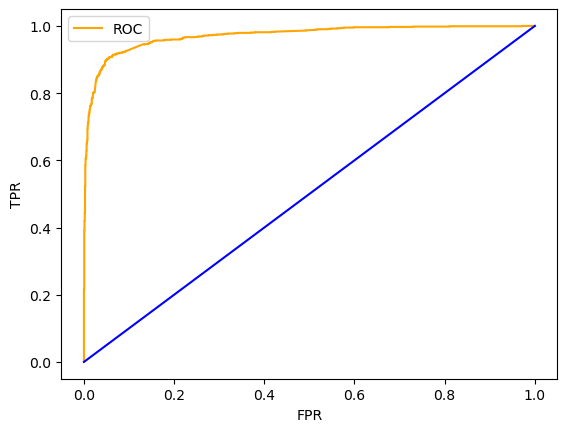

In [350]:
plot_roc_curve(fpr,tpr)

In [351]:
print(roc_auc_score(y_test,probs[:,1]))

0.9712239802130225


In [352]:
thresholds

array([1.99998608e+00, 9.99986080e-01, 9.99955113e-01, 9.99941022e-01,
       9.99160754e-01, 9.99151572e-01, 9.98727351e-01, 9.98685216e-01,
       9.98237334e-01, 9.98234633e-01, 9.97304506e-01, 9.97285888e-01,
       9.97276073e-01, 9.97246705e-01, 9.96484939e-01, 9.96437480e-01,
       9.96343417e-01, 9.96336137e-01, 9.95379043e-01, 9.95375713e-01,
       9.95245978e-01, 9.95220273e-01, 9.95201197e-01, 9.95113910e-01,
       9.95084474e-01, 9.95080933e-01, 9.94610222e-01, 9.94569358e-01,
       9.92757878e-01, 9.92736951e-01, 9.91158511e-01, 9.91104192e-01,
       9.90405363e-01, 9.90305654e-01, 9.88372875e-01, 9.88335439e-01,
       9.87896392e-01, 9.87894673e-01, 9.87844448e-01, 9.87802497e-01,
       9.87626079e-01, 9.87454764e-01, 9.82091445e-01, 9.82003991e-01,
       9.79405227e-01, 9.79393076e-01, 9.75367804e-01, 9.75295033e-01,
       9.74258689e-01, 9.74103802e-01, 9.68985071e-01, 9.68835726e-01,
       9.68654916e-01, 9.68157469e-01, 9.67794465e-01, 9.67393027e-01,
      

In [355]:
from sklearn.metrics import accuracy_score
accuracy_is = []
for thres in thresholds:
    y_pred = np.where(probs[:,1]>thres,1,0)
    accuracy_is.append(accuracy_score(y_test,y_pred, normalize= True))
    
accuracy_is = pd.concat([pd.Series(thresholds),pd.Series(accuracy_is)],axis=1)
accuracy_is.columns=['thresholds','accuracy']
accuracy_is.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_is.head()

,thresholds,accuracy
172,0.424586,0.931124
175,0.414270,0.930752
177,0.407972,0.930380
179,0.405093,0.930380
170,0.444886,0.930380


In [356]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [357]:
roc_predictions = [1 if i >= 0.424586 else 0 for i in probs[:,1]]

In [358]:
print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_test, predictions), accuracy_score(y_test, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_test, predictions), precision_score(y_test, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_test, predictions), recall_score(y_test, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_test, predictions), f1_score(y_test, roc_predictions)))

Accuracy Score Before and After Thresholding: 0.9285182427401341, 0.9314966492926284
Precision Score Before and After Thresholding: 0.9281997918834547, 0.9192734611503531
Recall Score Before and After Thresholding: 0.8788177339901477, 0.8975369458128079
F1 Score Before and After Thresholding: 0.9028340080971659, 0.9082751744765702


In [359]:
y_actual = pd.Series(y_test, name='Actual')
y_predict = pd.Series(roc_predictions, name='Predicted')
df_confusion = pd.crosstab(y_actual, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)
print (df_confusion)

Predicted    0    1  All
Actual                  
0          307  175  482
1          194  109  303
All        501  284  785


In [364]:
pd.crosstab

0       0
1       1
2       0
3       1
4       0
       ..
2681    0
2682    1
2683    0
2684    0
2685    1
Name: Predicted, Length: 2686, dtype: int64

In [360]:
print(confusion_matrix(y_test,roc_predictions))

[[1591   80]
 [ 104  911]]


In [361]:
print(classification_report(y_test,roc_predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1671
           1       0.92      0.90      0.91      1015

    accuracy                           0.93      2686
   macro avg       0.93      0.92      0.93      2686
weighted avg       0.93      0.93      0.93      2686



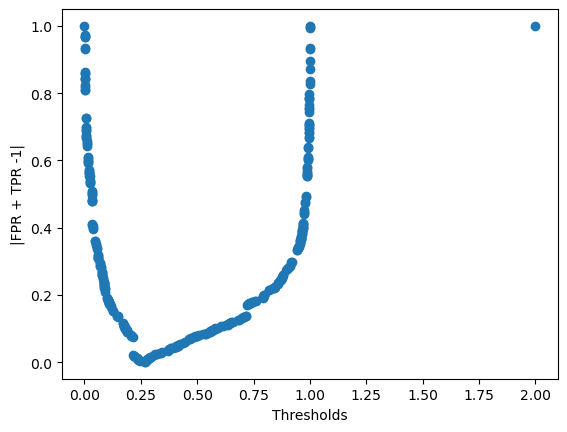

In [340]:
# plt.scatter(thresholds,np.abs(fpr+tpr-1))
# plt.xlabel('Thresholds')
# plt.ylabel("|FPR + TPR -1|")
# plt.show()

In [341]:
# thresholds[np.argmin(np.abs(fpr+tpr-1))]

0.26938797850277335

In [342]:
from sklearn.metrics import precision_recall_curve

In [343]:
p,r,thresholds = precision_recall_curve(y_test,probs[:,1])

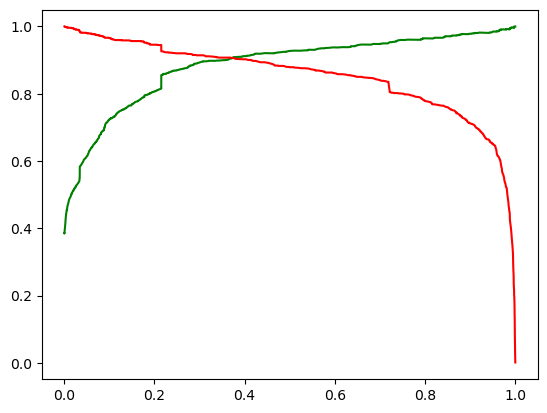

In [344]:
plt.plot(thresholds,p[:-1],color='green')
plt.plot(thresholds,r[:-1],color='red')
plt.show()

In [345]:
cfm_heatmap = confusion_matrix(y_test,predictions)

<AxesSubplot:>

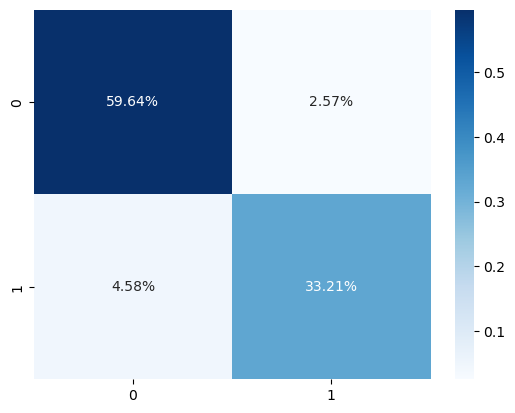

In [346]:
sns.heatmap(cfm_heatmap/np.sum(cfm_heatmap), annot=True, 
            fmt='.2%', cmap='Blues')

In [347]:
df['Converted'].value_counts()

0    5558
1    3395
Name: Converted, dtype: int64

In [327]:
#  import statsmodels.api as sm
# X_train_sm = sm.add_constant(X_train)
# logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
# res = logm2.fit()

# res.summary()

# y_train_pred = res.predict(X_train_sm)

In [328]:
# y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
# y_train_pred_final['Prospect ID'] = y_train.index
# y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.968110,4154
1,0,0.004856,6955
2,1,0.696550,8067
3,1,0.985224,3511
4,1,0.998745,4442


In [329]:

# y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# # Let's see the head
# y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.968110,4154,1
1,0,0.004856,6955,0
2,1,0.696550,8067,1
3,1,0.985224,3511,1
4,1,0.998745,4442,1


In [330]:
# from sklearn import metrics

# # Confusion matrix 
# confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
# print(confusion)

[[3729  158]
 [ 265 2115]]


In [331]:
# # Let's check the overall accuracy.
# print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.932503590234562


In [332]:
# # Let's create columns with different probability cutoffs 
# numbers = [float(x)/10 for x in range(10)]
# for i in numbers:
#     y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
# y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.968110,4154,1,1,1,1,1,1,1,1,1,1,1
1,0,0.004856,6955,0,1,0,0,0,0,0,0,0,0,0
2,1,0.696550,8067,1,1,1,1,1,1,1,1,0,0,0
3,1,0.985224,3511,1,1,1,1,1,1,1,1,1,1,1
4,1,0.998745,4442,1,1,1,1,1,1,1,1,1,1,1


In [333]:
# # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
# cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# from sklearn.metrics import confusion_matrix

# # TP = confusion[1,1] # true positive 
# # TN = confusion[0,0] # true negatives
# # FP = confusion[0,1] # false positives
# # FN = confusion[1,0] # false negatives

# num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# for i in num:
#     cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
#     total1=sum(sum(cm1))
#     accuracy = (cm1[0,0]+cm1[1,1])/total1
    
#     speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#     sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
#     cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
# print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.379767  1.000000  0.000000
0.1   0.1  0.861656  0.972689  0.793671
0.2   0.2  0.900910  0.952941  0.869051
0.3   0.3  0.924525  0.918487  0.928222
0.4   0.4  0.929312  0.902101  0.945974
0.5   0.5  0.932504  0.888655  0.959352
0.6   0.6  0.929631  0.866387  0.968356
0.7   0.7  0.924685  0.839916  0.976589
0.8   0.8  0.908728  0.786555  0.983535
0.9   0.9  0.893091  0.732353  0.991510


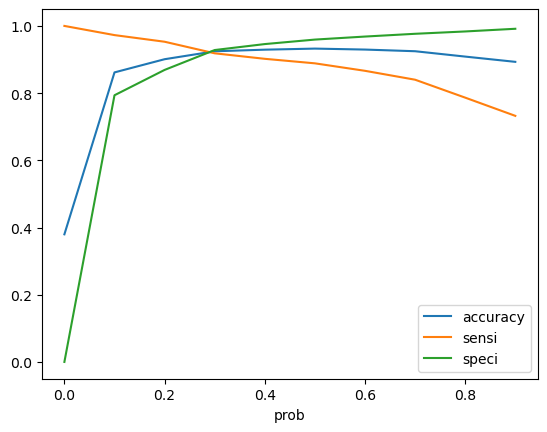

In [334]:
# # Let's plot accuracy sensitivity and specificity for various probabilities.
# cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
# plt.show()